# Customer Churn Prediction Using Artificial Neural Network (ANN)


#### Customer churn prediction is to measure why customers are leaving a business. Its a Telecom business data. I have to analyzed the data and build deep learning model to predict the churn. and evaluate the performance of our model.

In [66]:
import tensorflow as tf
from tensorflow import keras

In [67]:
# Importing Some Basic Libraries

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [69]:
# Load the Data

In [70]:
dataset=pd.read_csv("customer_churn.csv")
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
len(dataset)

7043

In [73]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [74]:
# customerID column is not useful for prediction so, we drop it out

In [75]:
dataset.drop('customerID',axis='columns',inplace=True)

In [76]:
dataset.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
# In dataset TotalCharges values should be float but it shown object datatype. lets check

dataset.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [78]:
# Lets convert into number

pd.to_numeric(dataset.TotalCharges)

ValueError: ignored

In [79]:
# some values seems to be balnk
dataset[dataset.TotalCharges==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [80]:
len(dataset[dataset.TotalCharges==' '])

11

In [81]:
# those only 11 datsets  i have going to drop this data
df=dataset[dataset.TotalCharges!=' ']

In [82]:
df.shape

(7032, 20)

In [83]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [84]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [86]:
len(df[df.Churn=='Yes'])

1869

In [87]:
len(df[df.Churn=='No'])

5163

In [88]:
# So 1869 customers are leave the business while 5163 are active in service

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


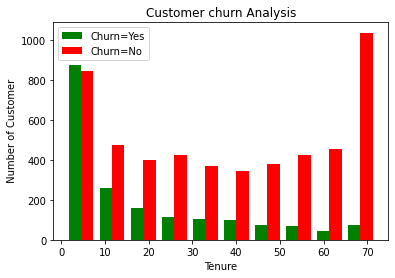

In [89]:
# Lets plot some graphs to visualize the data

# first we plot customers leaving business with respect to tenure
Churn_No=df[df.Churn=='No'].tenure
Churn_Yes=df[df.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel(" Number of Customer")
plt.title("Customer churn Analysis")


plt.hist([Churn_Yes,Churn_No], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

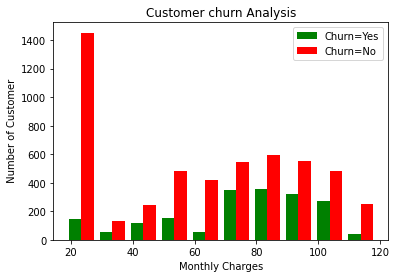

In [90]:
# first we plot customers leaving business with respect to tenure
Churn_No=df[df.Churn=='No'].MonthlyCharges
Churn_Yes=df[df.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel(" Number of Customer")
plt.title("Customer churn Analysis")


plt.hist([Churn_Yes,Churn_No], color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [91]:
# Lets check the Catogorical features in dataset

In [92]:
df.dtypes=='object'

gender               True
SeniorCitizen       False
Partner              True
Dependents           True
tenure              False
PhoneService         True
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges      False
TotalCharges        False
Churn                True
dtype: bool

In [93]:
df["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [94]:
def unique_catog_col_value(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}: {df[column].unique()}')

In [95]:
unique_catog_col_value(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [96]:
# we have seen some features have 'Yes' and 'No' values lets convert it into 1 & 0

In [97]:
cat_column=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for rec in cat_column:
  df[rec].replace({'Yes':1,'No':0},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [99]:
unique_catog_col_value(df)

gender: ['Female' 'Male']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [100]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [101]:
cat_column=['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for rec in cat_column:
  df[rec].replace({'Yes':1,'No':0},inplace=True)

In [102]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [103]:
unique_catog_col_value(df)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [104]:
#So Now for rest of the features have more than 2 unique values, so we have do Onehot encoding for this categorical features

In [105]:
df1=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'],drop_first=True)

In [106]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [108]:
# Feature Scaling required on Tenure,MonthlyCharges and TotalCharges Features

In [110]:
feat_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[feat_to_scale]=scaler.fit_transform(df1[feat_to_scale])

In [112]:
df1['MonthlyCharges'].unique()

array([0.11542289, 0.38507463, 0.35422886, ..., 0.44626866, 0.25820896,
       0.60149254])

In [113]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,0.115423,0.001275,0,0,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0.385075,0.215867,0,0,0,1,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,0.354229,0.010310,1,0,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0.239303,0.210241,0,0,0,1,0,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0.521891,0.015330,1,1,0,0,0,0,1,0


In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   float64
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [115]:
X=df1.drop('Churn',axis=1)
y=df1['Churn']

In [116]:
#Splitting the dataset into Training set and Test Set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [117]:
X_train.shape

(5625, 23)

In [119]:
X_test.shape

(1407, 23)

In [120]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [121]:
### Lets initialize the ANN
classifier=Sequential()

In [122]:
## Adding the input Layer and first hidden layer
classifier.add(Dense(18,input_shape=(23,),activation='relu'))

In [123]:
classifier

In [124]:
# adding the first hidden layer
classifier.add(Dense(units=13,activation='relu'))
#classifier.add(Dropout(0.2))

In [125]:
##adding the second hidden layer
classifier.add(Dense(units=8,activation='relu'))
#classifier.add(Dropout(0.3))

In [126]:
##  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [127]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                432       
                                                                 
 dense_1 (Dense)             (None, 13)                247       
                                                                 
 dense_2 (Dense)             (None, 8)                 112       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 800
Trainable params: 800
Non-trainable params: 0
_________________________________________________________________


In [130]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [132]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5
   
)

In [133]:
model_history=classifier.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
563/563 [==============================] - 5s 4ms/step - loss: 0.4458 - accuracy: 0.7842 - val_loss: 0.4354 - val_accuracy: 0.7903
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4284 - accuracy: 0.7929 - val_loss: 0.4321 - val_accuracy: 0.7818
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4212 - accuracy: 0.7988 - val_loss: 0.4279 - val_accuracy: 0.8045
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4220 - accuracy: 0.8018 - val_loss: 0.4266 - val_accuracy: 0.8038
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4203 - accuracy: 0.8044 - val_loss: 0.4256 - val_accuracy: 0.7982
Epoch 6/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4176 - accuracy: 0.8000 - val_loss: 0.4374 - val_accuracy: 0.8003
Epoch 7/100
563/563 [==============================] - 2s 3ms/step - loss: 0.4177 - accuracy: 0.8039 - val_loss: 0.4241 - val_accuracy: 0.8003

In [134]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

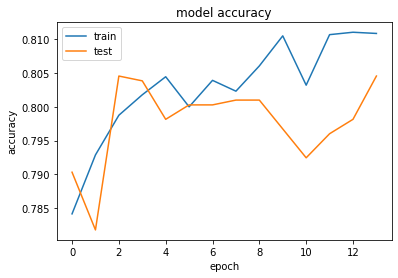

In [135]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

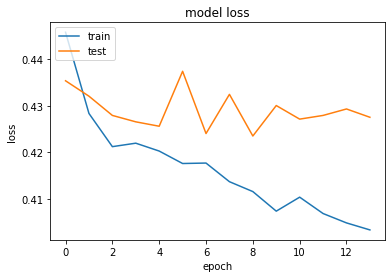

In [136]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [137]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

44/44 [==============================] - 0s 3ms/step


In [138]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[977,  61],
       [214, 155]])

In [139]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [140]:
score

0.8045486851457001

In [141]:
##get the weights
classifier.get_weights()

[array([[-4.10475314e-01,  6.42336607e-01, -2.01200619e-01,
          4.85457838e-01, -1.10988581e+00,  6.75860643e-01,
         -4.28059459e-01,  2.18086302e-01,  1.24533057e+00,
         -1.22412074e+00, -1.48419082e+00, -5.90601802e-01,
          3.83772373e-01,  4.83418912e-01,  1.60774171e-01,
         -1.10981929e+00,  7.73633301e-01,  7.77029574e-01],
        [ 3.03165346e-01, -9.85032201e-01,  1.82965979e-01,
          1.13326955e+00,  4.15699929e-01, -3.78825635e-01,
         -5.59611693e-02,  2.01790258e-01,  6.44214213e-01,
         -1.48654237e-01, -1.01157606e+00,  1.37942627e-01,
         -5.49939610e-02, -1.08239196e-01, -1.52679861e+00,
          9.54515219e-01, -1.92418098e-01,  1.65294266e+00],
        [ 2.89679915e-01, -1.96724796e+00, -1.26837209e-01,
          4.75750834e-01,  1.40197977e-01, -2.63154924e-01,
         -2.76950630e-03, -1.13206947e+00, -4.05640692e-01,
         -2.13047341e-01,  5.31246066e-01, -1.33789265e+00,
          8.27448249e-01,  3.60354930e

In [142]:
## Saving h5 file
classifier.save('Telecom_model.h5')

In [143]:
##laoding h5 file
from tensorflow import keras
classifier1=keras.models.load_model('Telecom_model.h5')

In [144]:
classifier1.predict(X_test)

44/44 [==============================] - 0s 1ms/step


array([[0.28311902],
       [0.07391685],
       [0.27108422],
       ...,
       [0.5230788 ],
       [0.24099384],
       [0.78147274]], dtype=float32)